In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pts=genfromtxt('mlr_data.csv',delimiter=",")
print(pts)

[[   nan    nan    nan]
 [  127.    13.  1235.]
 [  115.    12.  1080.]
 [  127.     7.   845.]
 [  150.     9.  1522.]
 [  156.     6.  1047.]
 [  182.    11.  1979.]
 [  156.    12.  1822.]
 [  132.    10.  1253.]
 [  137.     9.  1297.]
 [  113.     9.   946.]
 [  137.    15.  1713.]
 [  117.    11.  1024.]
 [  137.     8.  1147.]
 [  153.     6.  1092.]
 [  117.    13.  1152.]
 [  126.    10.  1336.]
 [  170.    14.  2131.]
 [  182.     8.  1550.]
 [  162.    11.  1884.]
 [  184.    10.  2041.]
 [  143.     6.   854.]
 [  159.     9.  1483.]
 [  108.    14.  1055.]
 [  175.     8.  1545.]
 [  108.     6.   729.]
 [  179.     9.  1792.]
 [  111.    15.  1175.]
 [  187.     8.  1593.]
 [  111.     7.   785.]
 [  115.     7.   744.]
 [  194.     5.  1356.]
 [  168.     7.  1262.]]


In [11]:
y_original=[]
x0_original=[]
x1_original=[]
x2_original=[]
#Adding values to varaibles from the data.
for i in range(1,len(points)):
    y_original.append(pts[i,0])
    x1_original.append(pts[i,1])
    x2_original.append(pts[i,2])
    x0_original.append(1)


In [13]:
#Creating arrays from lists
Y=np.array(y_original)   #Create Y matrix
X1=np.array([x0_original, x1_original, x2_original]) #X transpose matrix
X=np.transpose(X1)  #X matrix

In [15]:
B=np.matmul(np.matmul(np.linalg.inv(np.matmul(X1,X)),X1),Y)
print(" B values are: ", B)

 B values are:  [  1.13000666e+02  -6.19274518e+00   6.85386038e-02]


In [16]:
#calculating Error from actual vaules.
E= Y-np.matmul(X,B)
#print(E)
error=0
for i in range(0, len(points)-1):
    error+=E[i]**2
print("SE value for the data is: ",(float)(error/(len(points)-1)))

SE value for the data is:  86.44457133729861


In [17]:
y_predict=[]
for i in range(0,len(points)-1):
    y_predict.append(B[0]+x1_original[i]*B[1]+x2_original[i]*B[2])
#print("Pridicted value:", y_predict)
#print("Original value:", y_original)

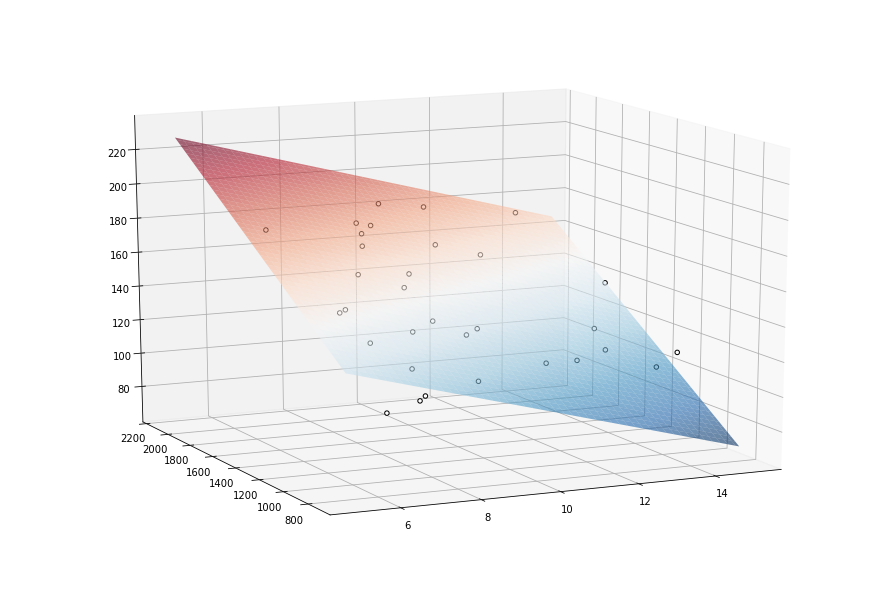

In [20]:
from mpl_toolkits.mplot3d import Axes3D
xx1, xx2 = np.meshgrid(np.linspace(min(x1_original),max(x1_original), 100), np.linspace(min(x2_original), max(x2_original), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = B[0] + B[1] * xx1 + B[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot predicted plane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)
# plot actual data 
ax.scatter(x1_original, x2_original, y_original, color='black', alpha=1.0, facecolor='white')
plt.show()